# Basic Search Algorithms
  *   Manual
  *   Grid Search
  *   Random Search
  *   Randomized Search with 
  *   Scikit Learn with Optimize
  *   Hyperopt

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import (
    KFold,
    RepeatedKFold,
    LeaveOneOut,
    LeavePOut,
    StratifiedKFold,
    cross_validate,
    GridSearchCV,
    train_test_split,
)

In [ ]:
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})
X.head()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((398, 30), (171, 30))

In [6]:
def initialize_estimate_objects():
  # K-Fold Cross-Validation
  kf = KFold(n_splits=5, shuffle=True, random_state=4)
  # Repeated K-Fold Cross-Validation
  rkf = RepeatedKFold(n_splits=5,n_repeats=10,random_state=4)
  # Leave One Out Cross-Validation
  loo = LeaveOneOut()
  # Leave P Out Cross-Validation
  lpo = LeavePOut(p=2)
  # Leave P Out Cross-Validation
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
  return kf,rkf,loo,lpo,skf

In [7]:
def initialize_model(pen,a):
  logit = LogisticRegression(penalty =pen, C=a, solver='liblinear', random_state=4, max_iter=10000)
  return logit 

In [8]:
def main(pen,a):
  kf,rkf,loo,lpo,skf=initialize_estimate_objects()
  logit=initialize_model(pen,a)
  clf =  cross_validate(
      logit,
      X_train, 
      y_train,
      scoring='accuracy',
      return_train_score=True,
      cv=kf)
  return clf

In [16]:
def execute(pen,a):
 clf=main(pen,a)
 print('mean train set accuracy for :',pen, "and ", a , ": ",np.mean(clf['train_score']), ' +- ', np.std(clf['train_score']))
 print('mean test set accuracy: for :',pen, "and ", a , ": ",np.mean(clf['test_score']), ' +- ', np.std(clf['test_score']))

# Searching Best Parameters Manually

In [15]:
execute()

mean train set accuracy for l2 and 0.001 0.9170836537134519  +-  0.0038064240947020133
mean test set accuracy: for l2 and 0.001  0.9195886075949368  +-  0.006259426475686005


In [17]:
execute('l1',0.001)

mean train set accuracy for : l1 and  0.001 :  0.9108002602472348  +-  0.007100388528878442
mean test set accuracy: for : l1 and  0.001 :  0.901993670886076  +-  0.005283578269225389


In [18]:
execute('l1',10)

mean train set accuracy for : l1 and  10 :  0.9773880641154552  +-  0.0023403158293980094
mean test set accuracy: for : l1 and  10 :  0.9472468354430379  +-  0.014591867891271527


In [21]:
execute('l2',10)

mean train set accuracy for : l2 and  10 :  0.9685948620886812  +-  0.004426551735731128
mean test set accuracy: for : l2 and  10 :  0.9497784810126582  +-  0.013608919570498668


# Searching Best Parameters using GridSearhCV

In [27]:
def mn():
  logit=initialize_model('l1',0.001)
  kf,rkf,loo,lpo,skf=initialize_estimate_objects()
  param_grid = dict(
        penalty=['l1', 'l2'],
        C=[0.1, 1, 10,100], 
    )
  clf = GridSearchCV(
                      logit,
                      param_grid,
                      scoring='accuracy',
                      cv=rkf, # repeated k-fold
                      refit=True) # refits best model to entire dataset)
  search = clf.fit(X_train, y_train)
  return search
  

In [28]:
search=mn()
print(search.best_params_)

{'C': 100, 'penalty': 'l1'}


In [37]:
results = pd.DataFrame(search.cv_results_)
print(results.shape)
results

(8, 60)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,mean_test_score,std_test_score,rank_test_score
0,0.073656,0.015275,0.002044,0.000237,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.9000,0.9125,0.9375,...,0.936709,0.911392,0.8875,0.9500,0.9375,0.886076,0.936709,0.922820,0.022496,8
1,0.005106,0.000550,0.001741,0.000280,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.9000,0.9250,0.9500,...,0.949367,0.924051,0.9250,0.9500,0.9250,0.898734,0.936709,0.932896,0.021612,7
2,0.199519,0.088867,0.002019,0.000168,1,l1,"{'C': 1, 'penalty': 'l1'}",0.9000,0.9375,0.9625,...,0.962025,0.962025,0.9250,0.9625,0.9250,0.911392,0.962025,0.948497,0.021488,5
3,0.006275,0.000661,0.001849,0.000231,1,l2,"{'C': 1, 'penalty': 'l2'}",0.9000,0.9375,0.9750,...,0.962025,0.949367,0.9250,0.9625,0.9250,0.911392,0.962025,0.945968,0.022963,6
4,0.301908,0.194003,0.002030,0.000288,10,l1,"{'C': 10, 'penalty': 'l1'}",0.9250,0.9500,0.9625,...,0.962025,0.987342,0.9500,0.9625,0.8875,0.936709,1.000000,0.955025,0.023470,2
5,0.006926,0.000646,0.001816,0.000184,10,l2,"{'C': 10, 'penalty': 'l2'}",0.9250,0.9500,0.9625,...,0.949367,0.974684,0.9250,0.9625,0.8875,0.936709,0.987342,0.951759,0.024031,4
6,0.386336,0.399016,0.002031,0.000205,100,l1,"{'C': 100, 'penalty': 'l1'}",0.9375,0.9625,0.9625,...,0.974684,0.987342,0.9625,0.9625,0.9125,0.962025,0.936709,0.958797,0.021617,1
7,0.008002,0.001393,0.001834,0.000246,100,l2,"{'C': 100, 'penalty': 'l2'}",0.9250,0.9375,0.9625,...,0.949367,0.974684,0.9375,0.9625,0.8750,0.936709,1.000000,0.952766,0.023373,3


In [39]:
# we can order the different models based on their performance
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results[['params', 'mean_test_score', 'std_test_score']]

,params,mean_test_score,std_test_score
0,"{'C': 100, 'penalty': 'l1'}",0.958797,0.021617
1,"{'C': 10, 'penalty': 'l1'}",0.955025,0.023470
2,"{'C': 100, 'penalty': 'l2'}",0.952766,0.023373
3,"{'C': 10, 'penalty': 'l2'}",0.951759,0.024031
4,"{'C': 1, 'penalty': 'l1'}",0.948497,0.021488
5,"{'C': 1, 'penalty': 'l2'}",0.945968,0.022963
6,"{'C': 0.1, 'penalty': 'l2'}",0.932896,0.021612
7,"{'C': 0.1, 'penalty': 'l1'}",0.922820,0.022496


In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)

Text(0.5, 0, 'Hyperparameter space')

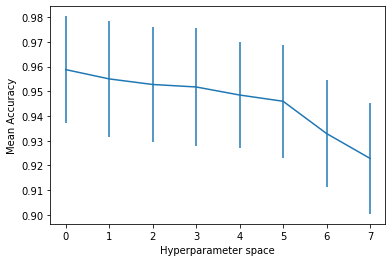

In [36]:
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean Accuracy')
plt.xlabel('Hyperparameter space')

In [40]:
X_train_preds = search.predict(X_train)
X_test_preds = search.predict(X_test)
print('Train accuracy_score: ', accuracy_score(y_train, X_train_preds))
print('Test accuracy_score: ', accuracy_score(y_test, X_test_preds))

Train accuracy_score:  0.9874371859296482
Test accuracy_score:  0.9473684210526315


# Searching Best Parameters using RandomSearch